In [1]:
library(clusterProfiler)
library(org.Hs.eg.db)
library(ReactomePA)
library(tidyverse)



Registered S3 method overwritten by 'enrichplot':
  method               from
  fortify.enrichResult DOSE

clusterProfiler v3.14.3  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are

In [2]:
setwd('/Users//matthewcoates/Documents/Cambridge/R files/COVID scRNAseq nasal biopsy + blood/DEGs/')

In [3]:
degs <- as.list(list.files('120721/MildCovvHealthy/', full.names= TRUE, pattern ='.csv'))

In [4]:

names(degs) <- gsub('120721/MildCovvHealthy/DEG_B_FO_mCOVH.csv', '', list.files('120721/MildCovvHealthy/',pattern ='.csv'))
names(degs) <- substr(names(degs), start = 1, stop = nchar(names(degs))-4)
names(degs)



[1] "DEG_B_FO_mCOVH"              "DEG_B_Naive_mCOVH"          
 [3] "DEG_B_nonswitched_mCOVH"     "DEG_B_switched_mCOVH"       
 [5] "DEG_Basophil_mCOVH"          "DEG_CD4_Act_mCOVH"          
 [7] "DEG_CD4_Tcm_mCOVH"           "DEG_CD4_Tem_mCOVH"          
 [9] "DEG_CD4_Th17_mCOVH"          "DEG_CD4_Tn_mCOVH"           
[11] "DEG_CD4_Trm_mCOVH"           "DEG_CD8_CTL_mCOVH"          
[13] "DEG_CD8_Tn_mCOVH"            "DEG_CD8_Trm_mCOVH"          
[15] "DEG_cDC_CD141_mCOVH"         "DEG_cDC_CD1c_mCOVH"         
[17] "DEG_Epi_Basal_mCOVH"         "DEG_Epi_Ciliated_mCOVH"     
[19] "DEG_Epi_Secretory_mCOVH"     "DEG_gdT_vd1_mCOVH"          
[21] "DEG_gdT_vd2_mCOVH"           "DEG_gdT_vd3_mCOVH"          
[23] "DEG_ILC_mCOVH"               "DEG_MAIT_mCOVH"             
[25] "DEG_Mast_mCOVH"              "DEG_Mega_mCOVH"             
[27] "DEG_MMP_nonres_mCOVH"        "DEG_MMP_res_mCOVH"          
[29] "DEG_Mono_classical_mCOVH"    "DEG_Mono_nonclassical_mCOVH"
[31] "DEG_NK_adaptive_mCOVH"       "DEG_NK_CD16_mCOVH"          
[33] "DEG_NK_CD56_mCOVH"           "DEG_pDC_mCOVH"              
[35] "DEG_Plasma_blastIgM_mCOVH"   "DEG_Plasma_mCOVH"           
[37] "DEG_Tfh_mCOVH"               "DEG_Treg_mCOVH"

In [5]:
degs

$DEG_B_FO_mCOVH
[1] "120721/MildCovvHealthy//DEG_B_FO_mCOVH.csv"

$DEG_B_Naive_mCOVH
[1] "120721/MildCovvHealthy//DEG_B_Naive_mCOVH.csv"

$DEG_B_nonswitched_mCOVH
[1] "120721/MildCovvHealthy//DEG_B_nonswitched_mCOVH.csv"

$DEG_B_switched_mCOVH
[1] "120721/MildCovvHealthy//DEG_B_switched_mCOVH.csv"

$DEG_Basophil_mCOVH
[1] "120721/MildCovvHealthy//DEG_Basophil_mCOVH.csv"

$DEG_CD4_Act_mCOVH
[1] "120721/MildCovvHealthy//DEG_CD4_Act_mCOVH.csv"

$DEG_CD4_Tcm_mCOVH
[1] "120721/MildCovvHealthy//DEG_CD4_Tcm_mCOVH.csv"

$DEG_CD4_Tem_mCOVH
[1] "120721/MildCovvHealthy//DEG_CD4_Tem_mCOVH.csv"

$DEG_CD4_Th17_mCOVH
[1] "120721/MildCovvHealthy//DEG_CD4_Th17_mCOVH.csv"

$DEG_CD4_Tn_mCOVH
[1] "120721/MildCovvHealthy//DEG_CD4_Tn_mCOVH.csv"

$DEG_CD4_Trm_mCOVH
[1] "120721/MildCovvHealthy//DEG_CD4_Trm_mCOVH.csv"

$DEG_CD8_CTL_mCOVH
[1] "120721/MildCovvHealthy//DEG_CD8_CTL_mCOVH.csv"

$DEG_CD8_Tn_mCOVH
[1] "120721/MildCovvHealthy//DEG_CD8_Tn_mCOVH.csv"

$DEG_CD8_Trm_mCOVH
[1] "120721/MildCovvHealthy//DEG_CD8_Trm_mCOVH.csv"

$DEG_cDC_CD141_mCOVH
[1] "120721/MildCovvHealthy//DEG_cDC_CD141_mCOVH.csv"

$DEG_cDC_CD1c_mCOVH
[1] "120721/MildCovvHealthy//DEG_cDC_CD1c_mCOVH.csv"

$DEG_Epi_Basal_mCOVH
[1] "120721/MildCovvHealthy//DEG_Epi_Basal_mCOVH.csv"

$DEG_Epi_Ciliated_mCOVH
[1] "120721/MildCovvHealthy//DEG_Epi_Ciliated_mCOVH.csv"

$DEG_Epi_Secretory_mCOVH
[1] "120721/MildCovvHealthy//DEG_Epi_Secretory_mCOVH.csv"

$DEG_gdT_vd1_mCOVH
[1] "120721/MildCovvHealthy//DEG_gdT_vd1_mCOVH.csv"

$DEG_gdT_vd2_mCOVH
[1] "120721/MildCovvHealthy//DEG_gdT_vd2_mCOVH.csv"

$DEG_gdT_vd3_mCOVH
[1] "120721/MildCovvHealthy//DEG_gdT_vd3_mCOVH.csv"

$DEG_ILC_mCOVH
[1] "120721/MildCovvHealthy//DEG_ILC_mCOVH.csv"

$DEG_MAIT_mCOVH
[1] "120721/MildCovvHealthy//DEG_MAIT_mCOVH.csv"

$DEG_Mast_mCOVH
[1] "120721/MildCovvHealthy//DEG_Mast_mCOVH.csv"

$DEG_Mega_mCOVH
[1] "120721/MildCovvHealthy//DEG_Mega_mCOVH.csv"

$DEG_MMP_nonres_mCOVH
[1] "120721/MildCovvHealthy//DEG_MMP_nonres_mCOVH.csv"

$DEG_MMP_res_mCOVH
[1] "120721/MildCovvHealthy//DEG_MMP_res_mCOVH.csv"

$DEG_Mono_classical_mCOVH
[1] "120721/MildCovvHealthy//DEG_Mono_classical_mCOVH.csv"

$DEG_Mono_nonclassical_mCOVH
[1] "120721/MildCovvHealthy//DEG_Mono_nonclassical_mCOVH.csv"

$DEG_NK_adaptive_mCOVH
[1] "120721/MildCovvHealthy//DEG_NK_adaptive_mCOVH.csv"

$DEG_NK_CD16_mCOVH
[1] "120721/MildCovvHealthy//DEG_NK_CD16_mCOVH.csv"

$DEG_NK_CD56_mCOVH
[1] "120721/MildCovvHealthy//DEG_NK_CD56_mCOVH.csv"

$DEG_pDC_mCOVH
[1] "120721/MildCovvHealthy//DEG_pDC_mCOVH.csv"

$DEG_Plasma_blastIgM_mCOVH
[1] "120721/MildCovvHealthy//DEG_Plasma_blastIgM_mCOVH.csv"

$DEG_Plasma_mCOVH
[1] "120721/MildCovvHealthy//DEG_Plasma_mCOVH.csv"

$DEG_Tfh_mCOVH
[1] "120721/MildCovvHealthy//DEG_Tfh_mCOVH.csv"

$DEG_Treg_mCOVH
[1] "120721/MildCovvHealthy//DEG_Treg_mCOVH.csv"

In [6]:
degs <- lapply(degs,function(i){
  read.table(i, header = T, sep = ",", row.names = NULL)
})
degs <- degs[order(names(degs))]
degs

X,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CXCR4,3.760511e-26,-1.180768,0.360,0.600,9.655111e-22
NR4A2,9.785873e-22,-1.259335,0.089,0.293,2.512523e-17
ZFP36,2.728238e-21,-1.111337,0.242,0.486,7.004752e-17
BTG2,3.245118e-21,-1.086605,0.200,0.424,8.331842e-17
EZR,6.219816e-17,-1.099412,0.326,0.524,1.596938e-12
IGKV3-20,8.180420e-09,1.525638,0.258,0.154,2.100323e-04
X,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
H1FX,1.471796e-07,1.832310,0.263,0.039,0.003778835


In [8]:
# form each list, extract the genes and ranking
geneList <- lapply(degs, function(x) {
 j <- AnnotationDbi::select(org.Hs.eg.db, keys = as.character(x$X), columns = c("ENTREZID", "SYMBOL"), keytype = "SYMBOL")
 x$ENTREZID = j$ENTREZID[match(x$X, j$SYMBOL)]
 y <- grepl('^RPS|^RPL|^MRPL|^MRPS|^MT-|^HBB', x$X) 
    # change X1 to column name of deg file holding the gene name
 x <- x[!y, ]
 gl <- x %>% dplyr::select(ENTREZID, avg_log2FC, p_val) # change X1, avg_logFC and p_val to the relevant column names
 gl$neglog10pval <- -log10(gl$p_val) # change p_val to the relevant column names
 rank <- unlist(gl$neglog10pval*sign(gl$avg_log2FC)) # change avg_logFC to the relevant column names
 rank[which(rank == -Inf)] <- -308
 rank[which(rank == Inf)] <- 308
 names(rank) <- gl$ENTREZID
 rank <- rev(sort(rank))
 return(rank)
})

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' ret

In [9]:
head(geneList)

$DEG_B_FO_mCOVH
     28912       7430       7832       7538       4929       7852 
  8.087224 -16.206222 -20.488769 -20.564118 -21.009400 -25.424753 

$DEG_B_Naive_mCOVH
     <NA>      1522     80097      3514     55904      7538      1604      3329 
 6.832153  3.278998  2.838962  1.270297 -1.059686 -1.192094 -1.225910 -1.726553 
     9516     10376      3320      6428      9308      7430      7852      4929 
-2.064275 -2.277932 -2.374119 -2.496820 -2.874945 -3.030623 -3.520985 -3.936978 

$DEG_B_nonswitched_mCOVH
     28912       5966      51646       7832       9308       7538       7852 
 16.734546  -9.825112 -10.525619 -14.680124 -20.831693 -21.769218 -23.221777 
      4929       7430 
-23.360329 -25.194878 

$DEG_B_switched_mCOVH
     28912      51646       4929       7852       7832       7430       7538 
  78.21828  -91.35420 -130.12480 -138.19716 -150.63056 -157.09455 -164.93091 

$DEG_Basophil_mCOVH
       1178        2512        1675        2624        4637        2495 
 9.29048830  9.01865424  7.11753385  6.51935096  6.44782789  5.54110941 
       2014        1439       64386       11031        3107        2205 
 5.42383254  4.30441791  4.16250182  4.12039060  3.62829412  3.54841660 
       6688        2206      283131         928        3105        5226 
 3.32705616  2.97583580  2.92130655  2.67607715  2.67319036  2.59944842 
       9535        3067        6277        6282       23646      653361 
 2.43942179  2.28014295  2.09853631  2.07520425  1.99877819  1.92281005 
      80774      359845       83541      647087       92241        6888 
 1.87803602  1.85883903  1.67594067  1.59808512  1.57494136  1.53227190 
       5873        2776       10628        9445       57205      201799 
 1.50130659  1.47990255  1.44906901  1.36520858  1.32396933  1.29416610 
        241         861        1848       23406        5552        1509 
 1.28030194  1.27111794  1.24132310  1.00217841  0.91796264  0.83039898 
      23765         514        7095       10594        6404        5997 
 0.80334853  0.75521890  0.62608723  0.60949506  0.60004506  0.56324910 
       2778        4946        4738        9750        7805        6303 
 0.48206739  0.44068208  0.42559948  0.37002809  0.36884234  0.36020926 
      51504       10589        6653        6923       27166        5441 
 0.33977064  0.32009785  0.31842928  0.31325133  0.30804267  0.28480363 
       8073         951        2113        9267        1316         752 
 0.26693126  0.24723689  0.22022303  0.19283331  0.18186708  0.16860340 
      10092         301       79002        5777       57062        8635 
 0.16128350  0.14471615  0.13941855  0.13587729  0.12924553  0.12010057 
       7323        6748        9584   100128731        6402      136319 
 0.11895288  0.11162690  0.10438751  0.09693836  0.09191937  0.08666527 
        805        1622        7094       27230        8878        1345 
 0.07672127  0.07003524  0.06610085  0.06363781  0.04499617  0.03228839 
       4694        4542        2987        8775         915       80097 
 0.02462405  0.00000000  0.00000000 -1.21418365 -1.27209738 -1.51856018 
       6892       51316        4708        5108       11007         864 
-1.66666671 -1.68936100 -1.70254358 -1.75836001 -1.89488852 -1.91044551 
      51107        2923        7402       80351        3683        6741 
-1.96873830 -1.98146985 -1.98146985 -1.99531503 -2.02207113 -2.02207113 
      55272         961        5250       10417        5094         309 
-2.04900677 -2.04900677 -2.06565348 -2.07160519 -2.10341735 -2.11702469 
       3275       55611      284996      168537       23523      126299 
-2.16661667 -2.20936069 -2.23643329 -2.24549350 -2.26367298 -2.26367298 
        914       51690        2547        5935       55303         924 
-2.28484815 -2.29107988 -2.31865413 -2.36031653 -2.42100040 -2.44597750 
       4707       10541        9839       10921       81539        3932 
-2.45552672 -2.48309554 -2.48309554 -2.51082113 -2.51082113 -2.53032508 
        382 

In [10]:
names(geneList)

[1] "DEG_B_FO_mCOVH"              "DEG_B_Naive_mCOVH"          
 [3] "DEG_B_nonswitched_mCOVH"     "DEG_B_switched_mCOVH"       
 [5] "DEG_Basophil_mCOVH"          "DEG_CD4_Act_mCOVH"          
 [7] "DEG_CD4_Tcm_mCOVH"           "DEG_CD4_Tem_mCOVH"          
 [9] "DEG_CD4_Th17_mCOVH"          "DEG_CD4_Tn_mCOVH"           
[11] "DEG_CD4_Trm_mCOVH"           "DEG_CD8_CTL_mCOVH"          
[13] "DEG_CD8_Tn_mCOVH"            "DEG_CD8_Trm_mCOVH"          
[15] "DEG_cDC_CD141_mCOVH"         "DEG_cDC_CD1c_mCOVH"         
[17] "DEG_Epi_Basal_mCOVH"         "DEG_Epi_Ciliated_mCOVH"     
[19] "DEG_Epi_Secretory_mCOVH"     "DEG_gdT_vd1_mCOVH"          
[21] "DEG_gdT_vd2_mCOVH"           "DEG_gdT_vd3_mCOVH"          
[23] "DEG_ILC_mCOVH"               "DEG_MAIT_mCOVH"             
[25] "DEG_Mast_mCOVH"              "DEG_Mega_mCOVH"             
[27] "DEG_MMP_nonres_mCOVH"        "DEG_MMP_res_mCOVH"          
[29] "DEG_Mono_classical_mCOVH"    "DEG_Mono_nonclassical_mCOVH"
[31] "DEG_NK_adaptive_mCOVH"       "DEG_NK_CD16_mCOVH"          
[33] "DEG_NK_CD56_mCOVH"           "DEG_pDC_mCOVH"              
[35] "DEG_Plasma_blastIgM_mCOVH"   "DEG_Plasma_mCOVH"           
[37] "DEG_Tfh_mCOVH"               "DEG_Treg_mCOVH"

In [11]:
# gsea
res = list()
for (i in 1:length(geneList)){
 y <- gsePathway(geneList[[i]], nPerm=10000,
                 pvalueCutoff=0.05,
                 pAdjustMethod="BH", verbose=FALSE)
 res[[i]] <-y    
}
res

no term enriched under specific pvalueCutoff...

no term enriched under specific pvalueCutoff...

no term enriched under specific pvalueCutoff...

no term enriched under specific pvalueCutoff...

Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“There are ties in the preranked stats (16.59% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
no term enriched under specific pvalueCutoff...

no term enriched under specific pvalueCutoff...

no term enriched under specific pvalueCutoff...

no term enriched under specific pvalueCutoff...

no term enriched under specific pvalueCutoff...

no term enriched under specific pvalueCutoff...

no term enriched under specific pvalueCutoff...

no term enriched under specific pvalueCutoff...

no term enriched under specific pvalueCutoff...

no term enriched under specific pvalueCutoff...

Warning message in fgsea(pathways = geneSets, stats = geneList,

[[1]]
#
# Gene Set Enrichment Analysis
#
#...@organism 	 human 
#...@setType 	 Reactome 
#...@keytype 	 ENTREZID 
#...@geneList 	 Named num [1:6] 8.09 -16.21 -20.49 -20.56 -21.01 ...
 - attr(*, "names")= chr [1:6] "28912" "7430" "7832" "7538" ...
#...nPerm 	 10000 
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...0 enriched terms found
'data.frame':	0 obs. of  8 variables:
 $ ID             : chr 
 $ Description    : chr 
 $ setSize        : int 
 $ enrichmentScore: num 
 $ NES            : num 
 $ pvalue         : num 
 $ p.adjust       : num 
 $ qvalues        : num 
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Molecular BioSystems
  2016, 12(2):477-479 


[[2]]
#
# Gene Set Enrichment Analysis
#
#...@organism 	 human 
#...@setType 	 Reactome 
#...@keytype 	 ENTREZID 
#...@geneList 	 Named num [1:16] 6.83 3.28 2.84 1.27 -1.06 ...
 - attr(*, "names")= chr [1:16] NA "1522" "80097" "3514" ...
#...n

In [11]:
for (i in 1:length(res)){
  plot <- dotplot(res[[i]], x = "NES", 'showCategory = 10')
    print(plot)
}

ERROR: Error in match.arg(color, c("pvalue", "p.adjust", "qvalue")): 'arg' should be one of “pvalue”, “p.adjust”, “qvalue”


In [12]:
length(res)

[1] 15

In [13]:
# gsea
for (i in 1:length(res))
{res[[i]] %>% dotplot(res[[i]], x = "NES", showCategory = 10)}

ERROR: Error in match.arg(color, c("pvalue", "p.adjust", "qvalue")): 'arg' must be NULL or a character vector


In [14]:
res[[i]] %>% dotplot(res[[i]], x = "NES", showCategory = 10)

ERROR: Error in match.arg(color, c("pvalue", "p.adjust", "qvalue")): 'arg' must be NULL or a character vector


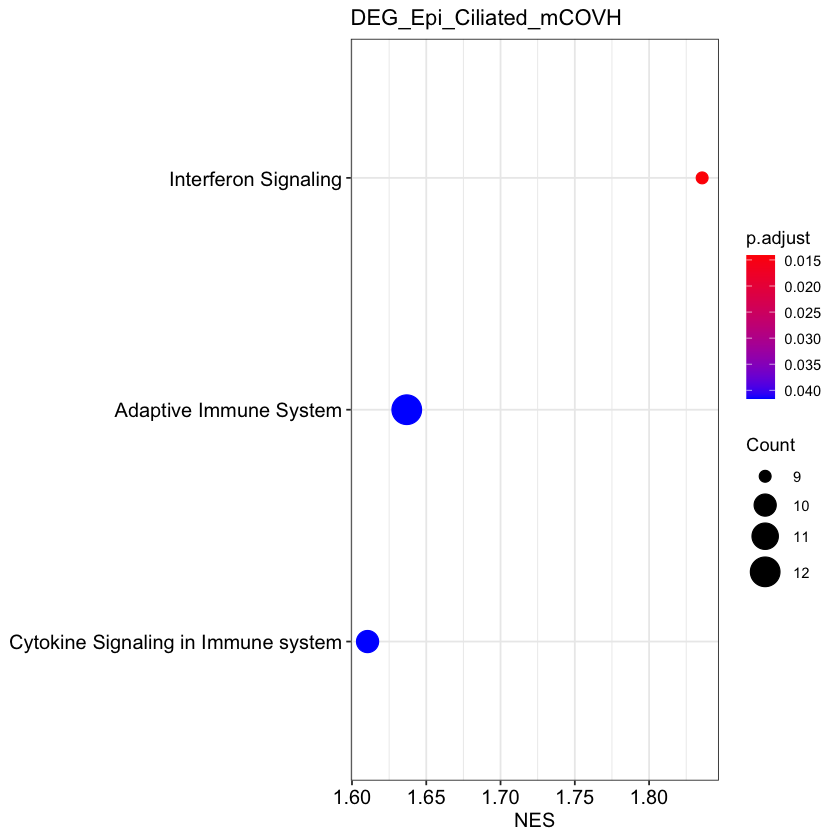

In [12]:
p1 <- dotplot(res[[18]], x = "NES", showCategory = 10) + ggtitle(names(geneList[18]))
p1

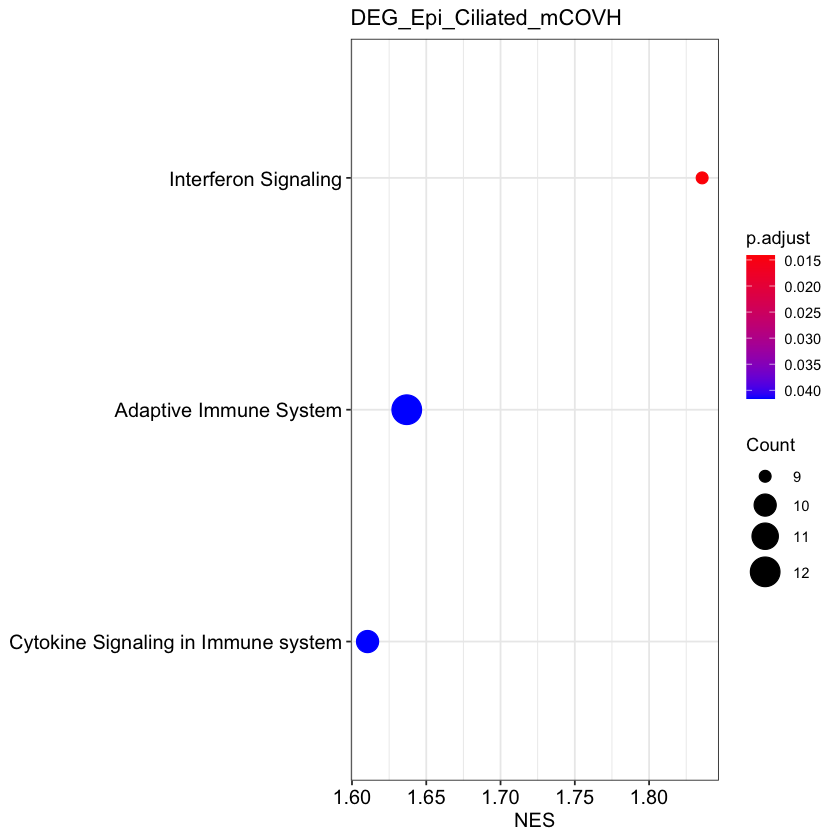

In [14]:
p2 <- dotplot(res[[18]], x = "NES", showCategory = 10) + ggtitle(names(geneList[18]))
p2

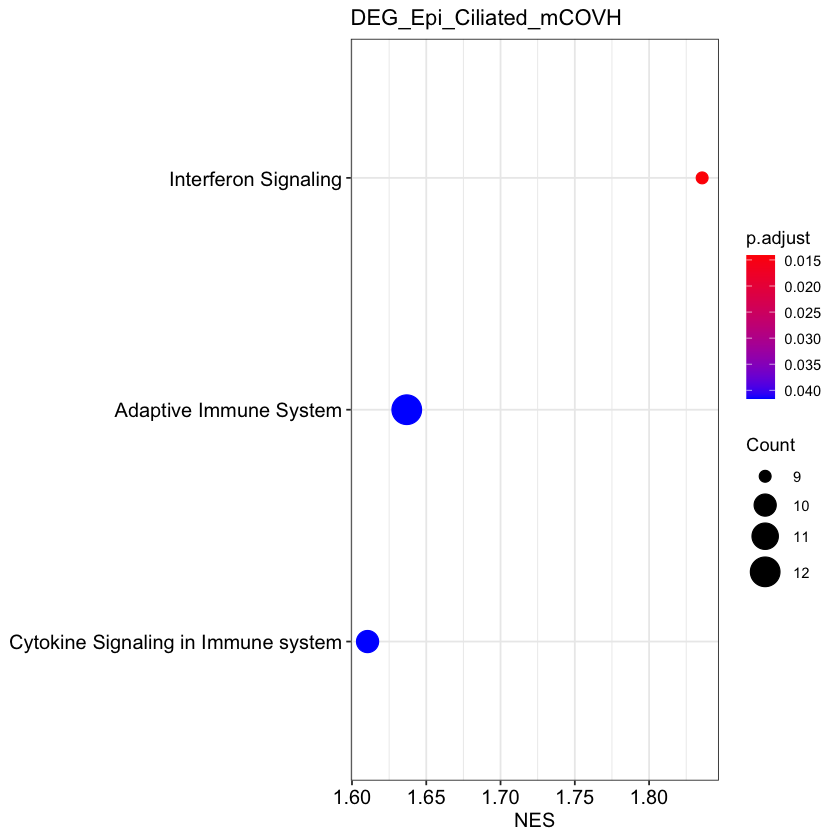

In [15]:
p3 <- dotplot(res[[18]], x = "NES", showCategory = 10) + ggtitle(names(geneList)[18])
p3

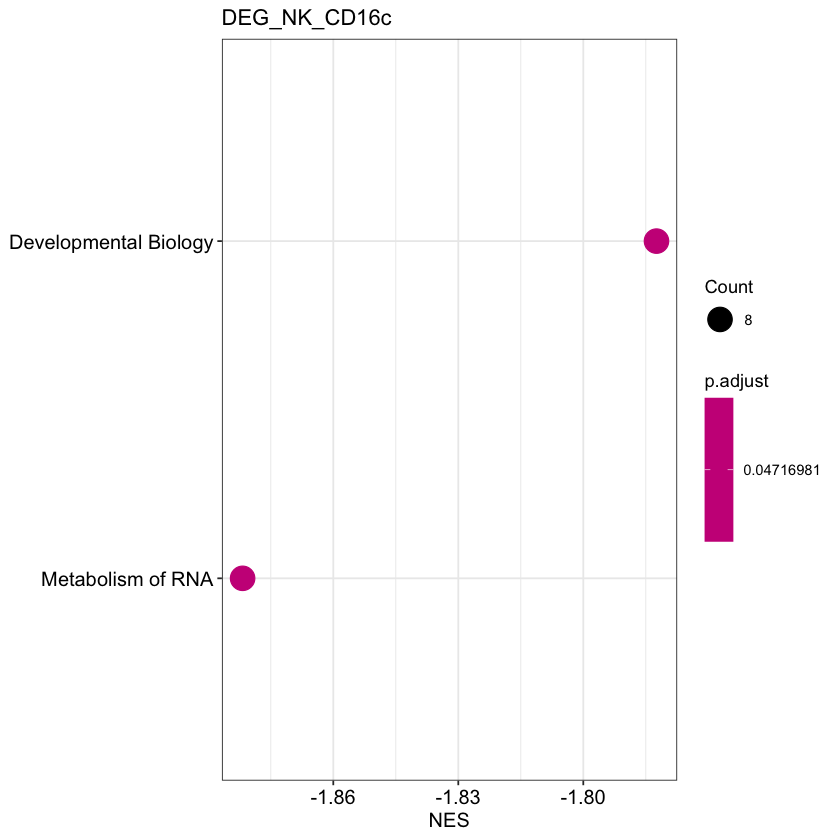

In [44]:
p4 <- dotplot(res[[12]], x = "NES", showCategory = 10) + ggtitle(names(geneList[12]))
p4

In [45]:
pdf("CovvsHealthyDEG_NK_CD16a.pdf")
p3
dev.off()

pdf 
  2

In [16]:
plotHistFunc <- function(x, na.rm = TRUE) {
  nm <- names(x)
  for (i in seq_along(nm)) {
print(ggplot(x,aes_string(x = nm[i])) + geom_histogram(alpha = .5,fill = "mediumseagreen")) }
}
plotHistFunc(res)

In [17]:
print(plotHistFunc(res))

NULL


In [18]:
res[c(1:4)]

[[1]]
#
# Gene Set Enrichment Analysis
#
#...@organism 	 human 
#...@setType 	 Reactome 
#...@keytype 	 ENTREZID 
#...@geneList 	 Named num [1:65] 12.853 5.481 3.398 3.203 0.988 ...
 - attr(*, "names")= chr [1:65] "1043" "914" "2014" "3001" ...
#...nPerm 	 10000 
#...pvalues adjusted by 'BH' with cutoff <0.2 
#...0 enriched terms found
'data.frame':	0 obs. of  8 variables:
 $ ID             : chr 
 $ Description    : chr 
 $ setSize        : int 
 $ enrichmentScore: num 
 $ NES            : num 
 $ pvalue         : num 
 $ p.adjust       : num 
 $ qvalues        : num 
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Molecular BioSystems
  2016, 12(2):477-479 


[[2]]
#
# Gene Set Enrichment Analysis
#
#...@organism 	 human 
#...@setType 	 Reactome 
#...@keytype 	 ENTREZID 
#...@geneList 	 Named num [1:163] 158.2 82.7 43.2 21.1 20.6 ...
 - attr(*, "names")= chr [1:163] "3107" "10578" "1043" "9235" ...
#.

In [19]:
length(res)

[1] 15

In [20]:
head(geneList$DEG_Cd16gNK_filtered)

NULL

In [21]:
ego3 <- gseGO(geneList     = geneList$DEG_Cd16gNK_filtered,
              OrgDb        = org.Hs.eg.db,
              ont          = "CC",
              nPerm        = 1000,
              minGSSize    = 100,
              maxGSSize    = 500,
              pvalueCutoff = 0.05,
              verbose      = FALSE)
ego3

--> Expected input gene ID: 79595,79718,9612,91748,1161,9734



ERROR: Error in check_gene_id(geneList, geneSets): --> No gene can be mapped....


In [ ]:
library(DOSE)
de <- names(geneList$DEG_NKTCD8Tem_filtered)[abs(geneList$DEG_NKTCD8Tem_filtered) > 2]

edo <- enrichDGN(de)
edo

In [ ]:
summary(geneList)

In [ ]:
library(enrichplot)
barplot(edo, showCategory=20)

In [ ]:
data(geneList$DEG_Cd16gNK_filtered, package="DOSE")
gene <- names(geneList$DEG_Cd16gNK_filtered)[abs(geneList$DEG_Cd16gNK_filtered) > 2]

gmtfile <- system.file("extdata", "h.cc.v5.0.entrez.gmt", package="clusterProfiler")
h <- read.gmt(gmtfile)

egmt <- enricher(gene, TERM2GENE=h)
head(egmt)

In [ ]:
?data

In [ ]:
geneList$DEG_Cd16gNK_filtered